# Earthquake location using iterative least squares # 
This problem focuses on iteratively determining a 3-dimensional earthquake location from travel times recorded at stations in the vincinity. The model consists of a three-dimensional earthquake location $x, y, z$ and the origin time $t_0$. The forward calculation consists of $R=\sqrt(x^2 + y^2 + z^2)$, meaning the problem is non-linear. The inversion is performed using an iterative matrix-based approach. We use a homogeneous crustal Earth model with wave speed, v=5.8 km/s

Problem details: 
- Model: Earthquake location $(z, y, x)$ and origin time $t_0$
- Data: Travel time $t$ to recording stations
- Forward: Non-linear; $\int_R \frac{1}{v(x)} dl$, with $R=\sqrt(x^2 + y^2 + z^2)$, which becomes $t = \frac{R}{v}$ with $v(x) = v = const.$ 
- Solver: Linear least squares using $m_{i+1} = m_i + (G_i^T C_D^{-1} G_i)G_i^T C_D^{-1}(d_i - g(m_i))$
- Over-determined (more recordings than unknowns)
- 3-dimensional
- Iterative: Yes



Code details:
- Initialise the problem: ``from InversionTestProblems import Earthquake_Leastsquares as eql_fcn``. Makes the subsequent functions available.
- ``eql_basics=eql_fcn.Earthquake()`` initialises a ``basics`` class object that contains the recorded data (i.e. travel times to recording locations) and the following changeable parameters. Setting these parameters is optional:
    - eql_basics.nit: Specifies number of iteations (single integer)
    - eql_basics.n_used: Specifies number of stations used (single integer; between 0 and 10)
    - eql_basics.model: Changes the starting location (4x1 float)
    - eql_basics.noise: Adds normally distributed noise to the travel time recordings (single float; between 0 and 1); the maximum of the distribution is set to eql_basics.noise*maximum(data)
- ``model=eql_fcn.init_routine(eql_basics)`` initialises a starting model, if it has not been set previously.
-``synthetic, gradient = eql_fcn.forward(eql_basics, model)`` creates synthetic data based on the model and source and receiver locations. A gradient is not needed here and ''gradient'' is returned as an empty variable. 
- ``result= eql_fcn.solver(eql_basics, model, synthetic, gradient)`` performs the inversion.
- ``eql_fcn.plot_model(eql_basics, result)`` plots the result.


 Iteration  0 Chisq  2700.705277357193  Current location -5.0000 20.0000 25.0000  0.0000
 Iteration  1 Chisq  1631.3018304148243  Current location 16.2687 -8.1728 19.9901  6.0567
 Iteration  2 Chisq  55.985665483299734  Current location  8.8322  1.6700 13.0967  5.1550
 Iteration  3 Chisq  0.2666437570007426  Current location 10.0891 -0.0806 10.2577  5.0085
 Iteration  4 Chisq  1.4286067424252347e-05  Current location  9.9994  0.0003 10.0013  5.0002
 Iteration  5 Chisq  8.571772985099102e-15  Current location 10.0000 -0.0000 10.0000  5.0000
 Iteration  6 Chisq  7.888609052210117e-29  Current location 10.0000  0.0000 10.0000  5.0000
 Iteration  7 Chisq  7.888609052210117e-29  Current location 10.0000  0.0000 10.0000  5.0000
 Iteration  8 Chisq  7.888609052210117e-29  Current location 10.0000  0.0000 10.0000  5.0000
 Iteration  9 Chisq  1.5777218104420234e-28  Current location 10.0000 -0.0000 10.0000  5.0000

Station arrival time residuals for each iteration

                0       1    

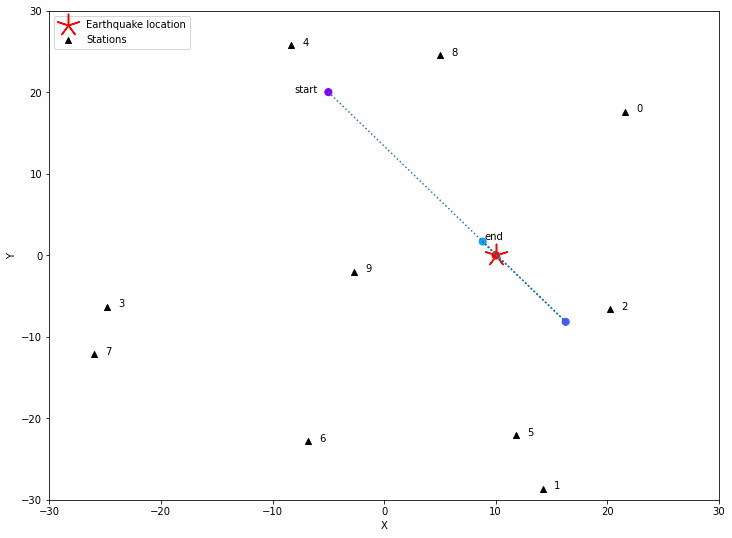

In [1]:
from cofitestsuite.earthquakeleastsquares import eqleastsquares as eql_fcn

eql_basics=eql_fcn.basics()
eql_basics.nit=10 # Iterations
eql_basics.n_used=10 # No of stations used (0-10)
eql_basics.model = [-5.0, 20.0, 25.0, 0.0] # Start earthquake location
eql_basics.noise=0 # Noise; [0:1] of maximum value of eql_basics.data
model=eql_fcn.init_routine(eql_basics)
synthetic, gradient = eql_fcn.forward(eql_basics, model)
result= eql_fcn.solver(eql_basics, model, synthetic, gradient)
eql_fcn.plot_model(eql_basics, result)

In [5]:
dir(result)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'chisq',
 'model_recovered',
 'r']